# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

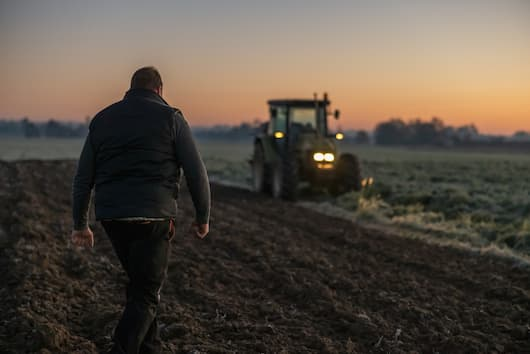

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In [91]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Dataset
crops = pd.read_csv("/Users/dani/Data Science/Projects/DataCamp Projects/Predictive Modeling for Agriculture/datasets/soil_measures.csv")


EDA

In [92]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


In [93]:
crops['crop'] = crops['crop'].astype('category')

In [94]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   N       2200 non-null   int64   
 1   P       2200 non-null   int64   
 2   K       2200 non-null   int64   
 3   ph      2200 non-null   float64 
 4   crop    2200 non-null   category
dtypes: category(1), float64(1), int64(3)
memory usage: 71.7 KB


In [95]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [96]:
display(crops.crop.value_counts())

crop
apple          100
banana         100
rice           100
pomegranate    100
pigeonpeas     100
papaya         100
orange         100
muskmelon      100
mungbean       100
mothbeans      100
mango          100
maize          100
lentil         100
kidneybeans    100
jute           100
grapes         100
cotton         100
coffee         100
coconut        100
chickpea       100
blackgram      100
watermelon     100
Name: count, dtype: int64

In [97]:
display(crops.crop.isna().sum())

display(list(crops.crop.unique()))

0

['rice',
 'maize',
 'chickpea',
 'kidneybeans',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

Modeling

In [98]:
random_state = 42

X = crops.drop('crop', axis=1)
y = crops.crop

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2
                                                   )

display((X_train.shape, X_test.shape))

((1760, 4), (440, 4))

Looping through each DataFrame feature and producing F1-Scores

In [99]:
features = list(X.columns)

for feature in features: 
    model = LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=random_state) # multi-class classification
    model.fit(X_train[[feature]], y_train)
    y_pred = model.predict(X_test[[feature]])
    feature_performance = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-score for {feature}: {feature_performance}")


F1-score for N: 0.07581200295026048
F1-score for P: 0.12441368883489855
F1-score for K: 0.23212490854656867
F1-score for ph: 0.03521655467850798


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Multicollinearity check

<Axes: >

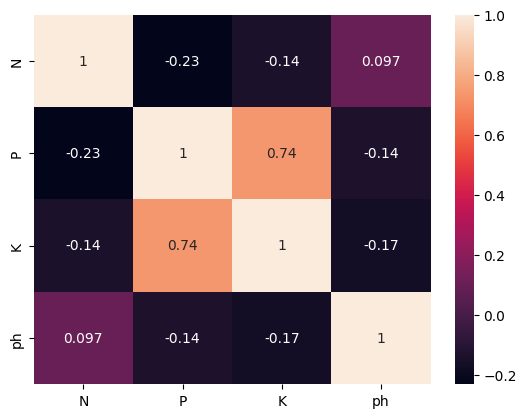

In [100]:
sns.heatmap(X.corr(), annot=True)

In [101]:
# K & P have the highest correlation, removing P

final_features = crops[['N', 'K', 'ph']]

Final Modeling

In [102]:
X = final_features
y = crops.crop

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2
                                                   )
display((X_train.shape, X_test.shape))

((1760, 3), (440, 3))

In [103]:
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=random_state).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

model_performance = f1_score(y_test, y_pred, average='weighted')
model_check = model_performance > 0.50 # this is our brief target

display(f"Our final F-1 Score is above our target of 0.50: {model_check}")
display(f"F-1 Score: {model_performance}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'Our final F-1 Score is above our target of 0.50: True'

'F-1 Score: 0.5948127936986273'